# Importing required packages

In [1]:
from PIL import Image
from selenium import webdriver
import requests
import os
import time

# Creating chrome driver instance

In [2]:
Path=r"/Users/koushikmukka/Downloads/chromedriver_mac_arm64/chromedriver"
driver=webdriver.Chrome(Path)

In [3]:
#opening the url for example in created chromedriver instance
url = 'https://www.google.com/search?q=ai+generated+images&tbm=isch'
driver.get(url)

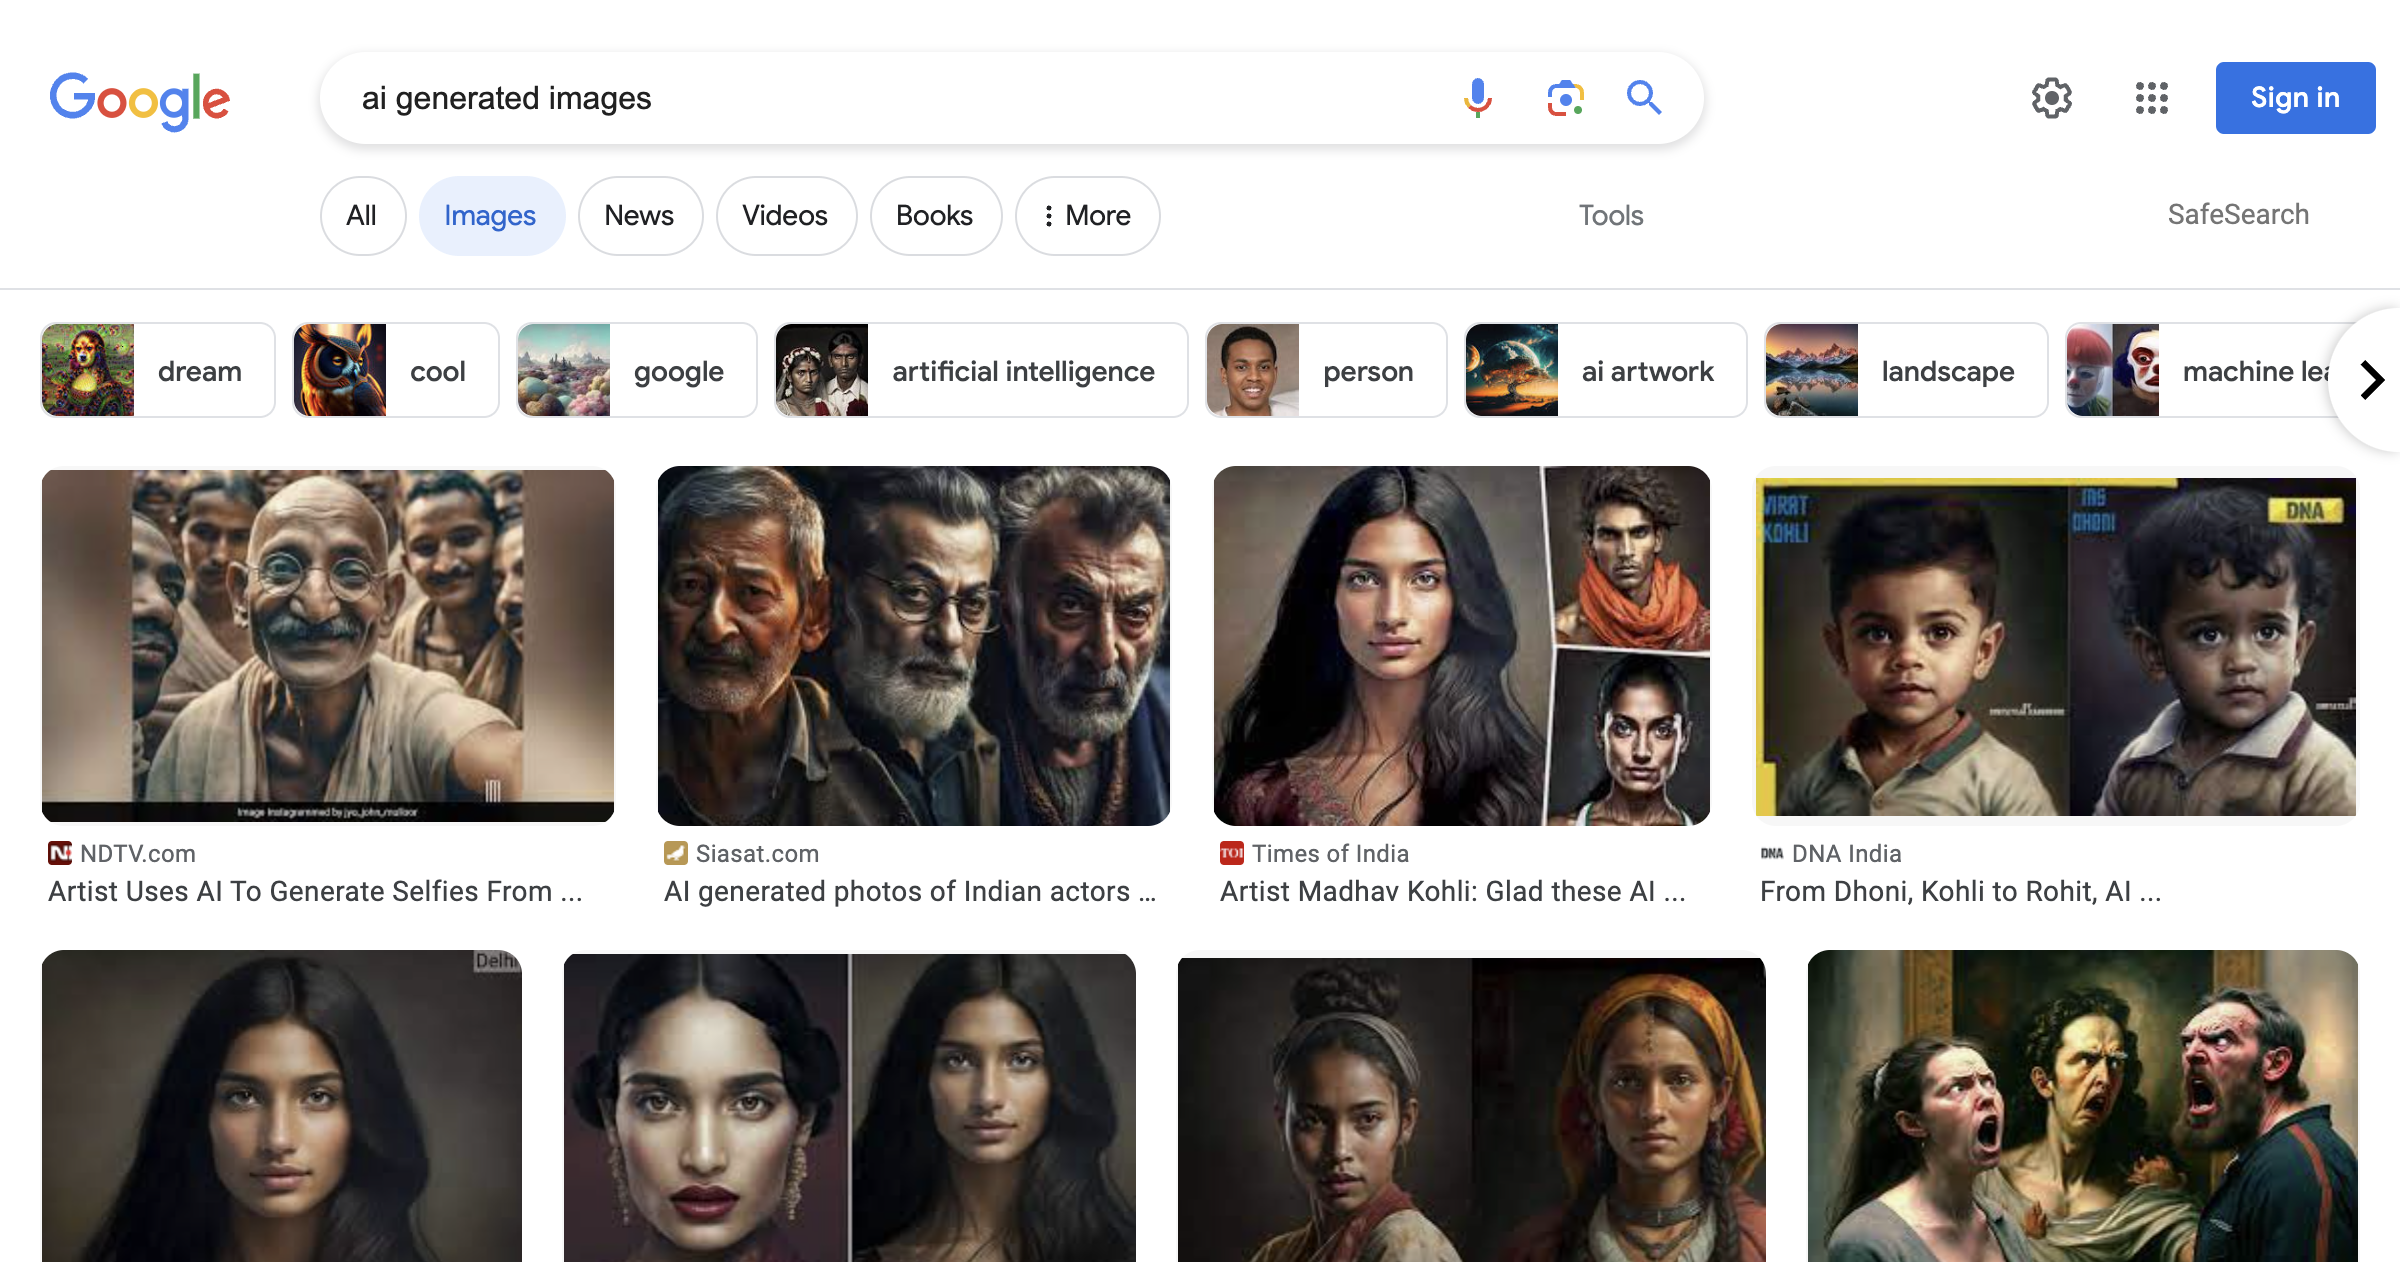

In [4]:
#saving the screenshot to result.png
driver.save_screenshot('result.png')
img = Image.open('result.png')
img

In [5]:
#choosing images by their xpath
xPath = """//*[@id="islrg"]/div[1]/div[%s]"""%(1)
driver.find_element_by_xpath(xPath).click()

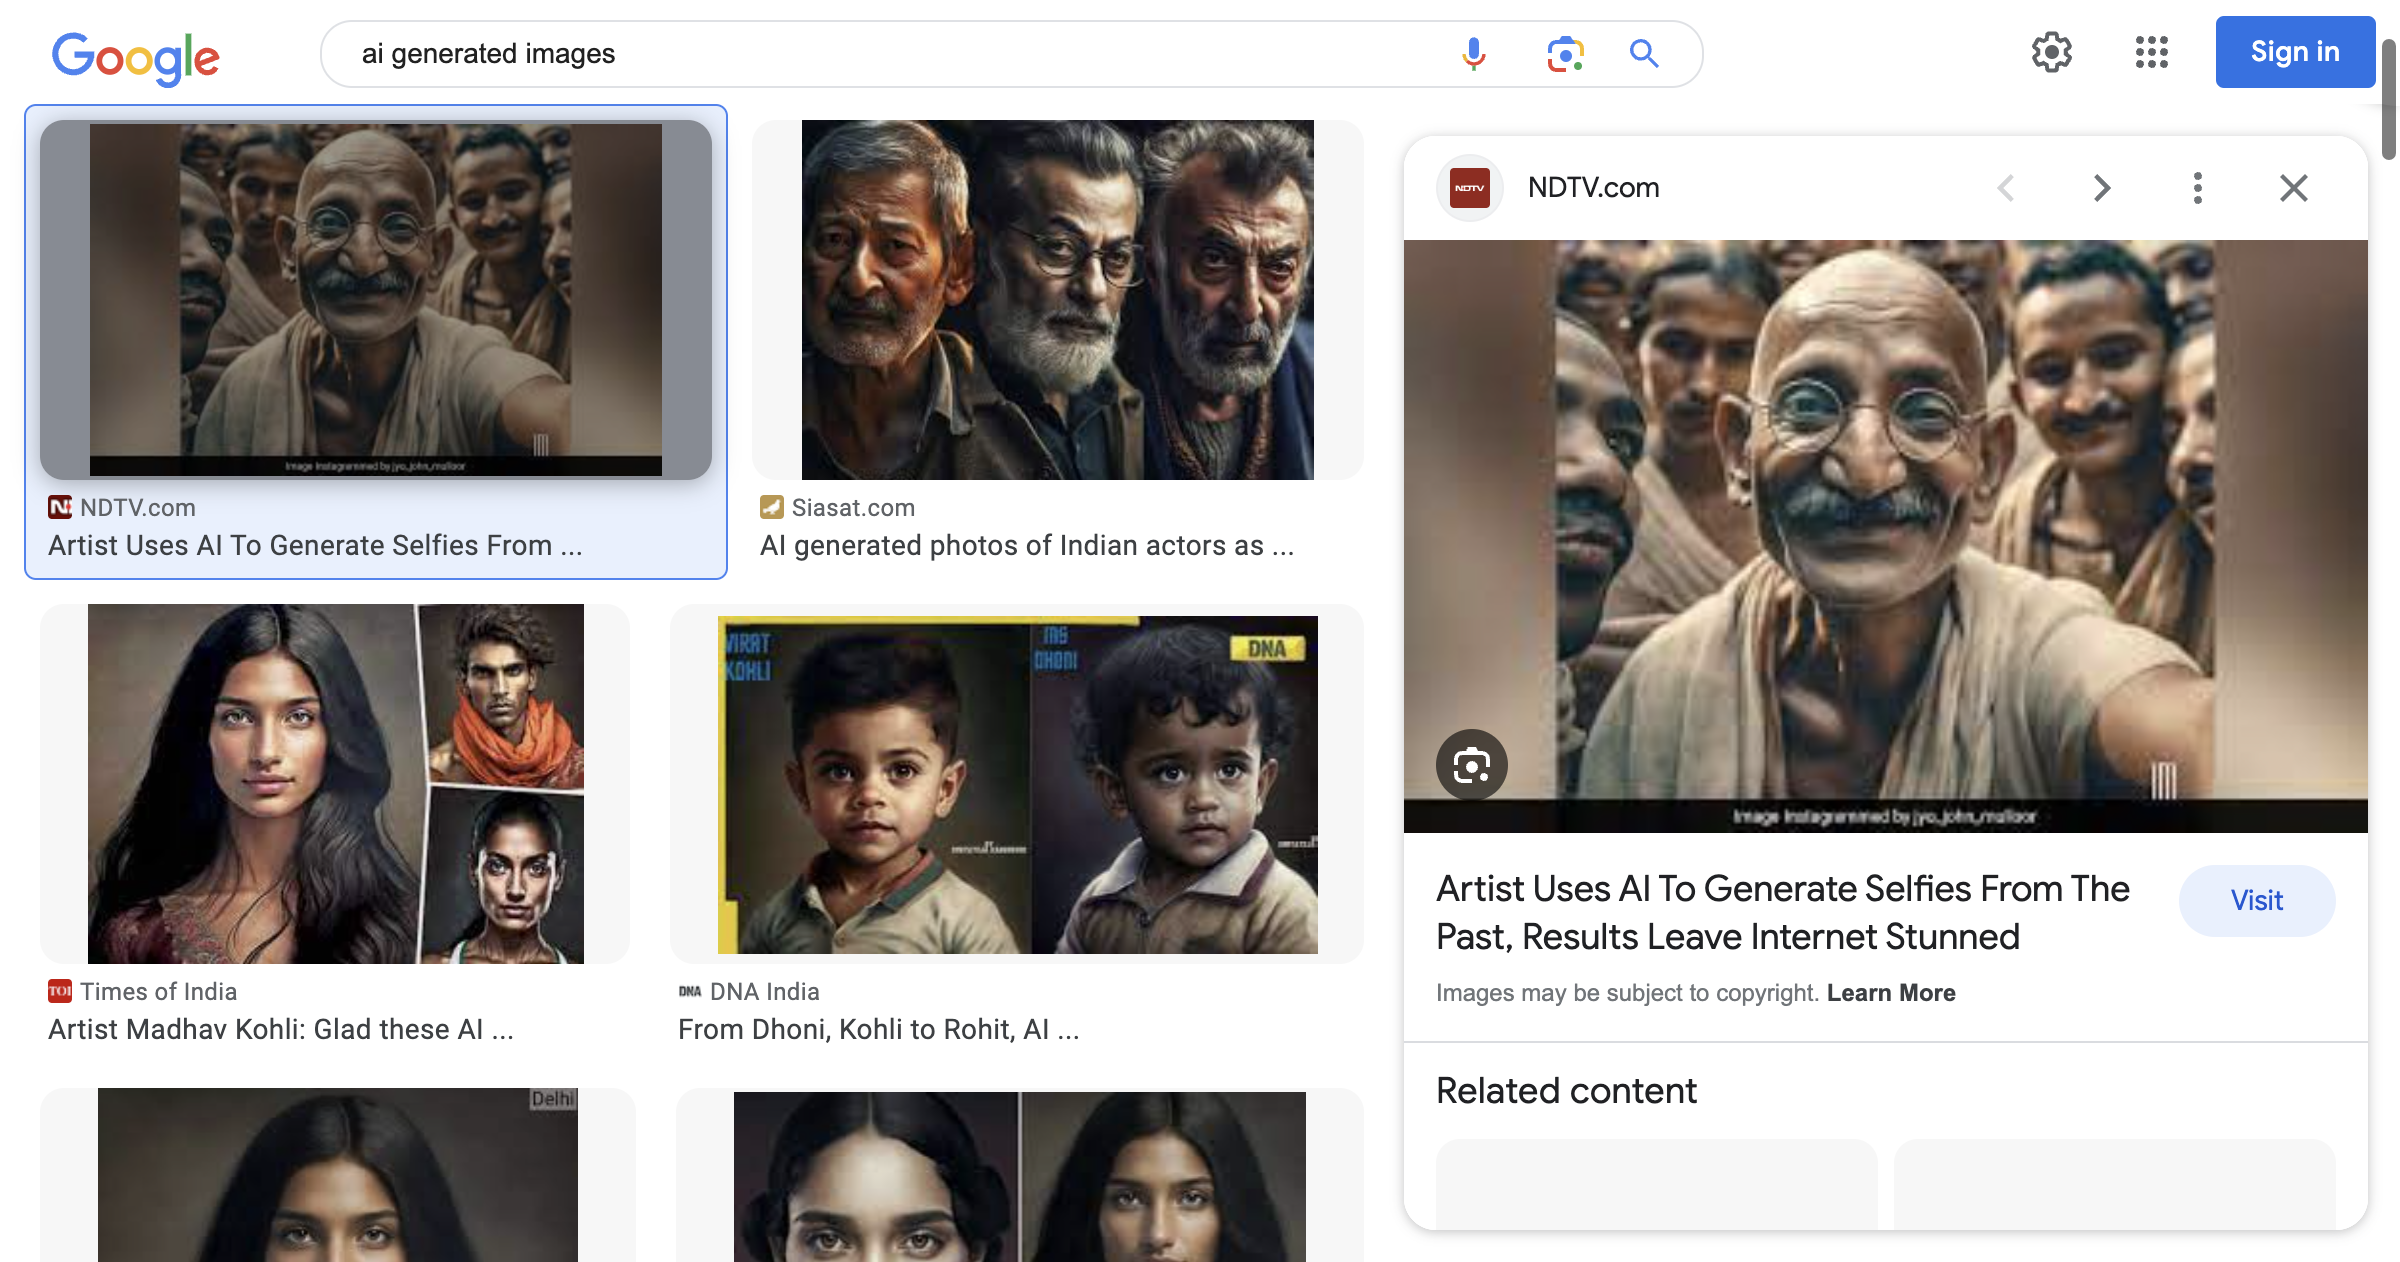

In [6]:
driver.save_screenshot('result2.png')
img1 = Image.open('result2.png')
img1

In [7]:
os.makedirs('/Users/koushikmukka/Documents/real_and_ai_images/ai-generated-images')

In [8]:
#function to automate clicking on images and downloading them
def download_image(url, name):

    # write image to file
    reponse = requests.get(url)
    if reponse.status_code==200:
        with open(os.path.join('/Users/koushikmukka/Documents/real_and_ai_images/ai-generated-images',name+".jpg"), 'wb') as file:
            file.write(reponse.content)

In [9]:
def download(url,name,num_images=50):
    driver.get(url)
    for i in range(1, num_images+1):
        if i % 25 == 0:
            continue

        previewImageXPath = """//*[@id="islrg"]/div[1]/div[%s]/a[1]/div[1]/img"""%(i)
        previewImageElement = driver.find_element_by_xpath(previewImageXPath)
        previewImageURL = previewImageElement.get_attribute("src")

        xPath = """//*[@id="islrg"]/div[1]/div[%s]"""%(i)
        driver.find_element_by_xpath(xPath).click()

        timeStarted = time.time()
        while True:
            try:
                imageElement = driver.find_element_by_xpath("""//*[@id="Sva75c"]/div[2]/div/div[2]/div[2]/div[2]/c-wiz/div/div/div/div[3]/div[1]/a/img[1]""")
                imageURL= imageElement.get_attribute('src')

                if imageURL != previewImageURL:
                    break

                else:
                    currentTime = time.time()
                    if currentTime - timeStarted > 10:
                        print("Timeout! Will download a lower resolution image and move onto the next one")
                        break
            except:
                print("No such image %s found,continuing downloading the previous one"%(i))
                break


        #Downloading image
        try:
            download_image(imageURL, name+str(i))
            print("Downloaded element %s out of %s total. URL: %s" % (i, num_images , imageURL))
        except:
            print("Couldn't download an image %s, continuing downloading the next one"%(i))

# Downloading AI generated images


In [10]:
url = 'https://www.google.com/search?q=ai+generated+images&tbm=isch'
download(url,"AIGeneratedImages",num_images=50)

Timeout! Will download a lower resolution image and move onto the next one
Couldn't download an image 1, continuing downloading the next one
Downloaded element 2 out of 50 total. URL: https://cdn.siasat.com/wp-content/uploads/2023/05/RK-AI.jpg
Downloaded element 3 out of 50 total. URL: https://static.toiimg.com/thumb/msid-96715731,width-400,resizemode-4/96715731.jpg
Downloaded element 4 out of 50 total. URL: https://cdn.dnaindia.com/sites/default/files/styles/full/public/2023/02/11/2572264-untitled-design-1.jpg
Downloaded element 5 out of 50 total. URL: https://m.economictimes.com/thumb/msid-96622207,width-1200,height-900,resizemode-4,imgsize-17564/ai-women.jpg
Downloaded element 6 out of 50 total. URL: https://www.shethepeople.tv/wp-content/uploads/2022/12/AI-Generated-Images.jpeg
Downloaded element 7 out of 50 total. URL: https://c.ndtvimg.com/2022-12/24jo7tag_a-delhi-and-mumbai-woman-depicted-in-the-aigenerated-artwork_625x300_29_December_22.jpg?im=Resize=(1230,900)
Downloaded eleme

In [11]:
url = 'https://www.google.com/search?q=dalle2+generated+images&tbm=isch'
download(url,"DalleGeneratedImages",num_images=50)

Timeout! Will download a lower resolution image and move onto the next one
Couldn't download an image 1, continuing downloading the next one
Downloaded element 2 out of 50 total. URL: https://cdn.vox-cdn.com/thumbor/kfDcsHjHNcpA2f0Wp5cXf5ww-Pk=/0x0:1024x1024/1400x1400/filters:focal(519x754:520x755)/cdn.vox-cdn.com/uploads/chorus_asset/file/23371032/DALL_E_Teddy_bears_mixing_sparkling_chemicals_as_mad_scientists__steampunk.png
Downloaded element 3 out of 50 total. URL: https://michaelhoweely.com/wp-content/uploads/2022/07/DALL%C2%B7E-2022-06-27-10.01.31-a-samurai-riding-a-horse-on-mars-lomography-1024x1024.png
No such image 4 found,continuing downloading the previous one
Downloaded element 4 out of 50 total. URL: https://michaelhoweely.com/wp-content/uploads/2022/07/DALL%C2%B7E-2022-06-27-10.01.31-a-samurai-riding-a-horse-on-mars-lomography-1024x1024.png
Timeout! Will download a lower resolution image and move onto the next one
Couldn't download an image 5, continuing downloading the ne

In [12]:
url = 'https://www.google.com/search?q=midjourney&tbm=isch'
download(url,"MidjourneyGeneratedImages",num_images=50)


Timeout! Will download a lower resolution image and move onto the next one
Couldn't download an image 1, continuing downloading the next one
Timeout! Will download a lower resolution image and move onto the next one
Couldn't download an image 2, continuing downloading the next one
Downloaded element 3 out of 50 total. URL: https://images.immediate.co.uk/production/volatile/sites/4/2023/02/Midjourney-small-f3a9034.jpg
Downloaded element 4 out of 50 total. URL: https://www.howtogeek.com/wp-content/uploads/2022/08/MidJourney-wizard-hall.jpg?height=200p&trim=2,2,2,2
Downloaded element 5 out of 50 total. URL: https://www.pcworld.com/wp-content/uploads/2023/04/mhachman_a_castle_on_an_asteroid_floating_through_space_2315526d-252b-40df-9a6d-eeb00aed612f.png?w=1024
Downloaded element 6 out of 50 total. URL: https://cdn.arstechnica.net/wp-content/uploads/2022/11/midjourney_v4_hero_2-800x450.jpg
Downloaded element 7 out of 50 total. URL: https://www.stirworld.com/images/article_gallery/ai-generat

In [13]:
url = 'https://www.google.com/search?q=stable%20diffusion&tbm=isch'
download(url,"StableDiffusionGeneratedImages",num_images=50)

Timeout! Will download a lower resolution image and move onto the next one
Couldn't download an image 1, continuing downloading the next one
Downloaded element 2 out of 50 total. URL: https://r2.stablediffusionweb.com/images/stable-diffusion-demo-1.webp
Downloaded element 3 out of 50 total. URL: https://miro.medium.com/v2/resize:fit:1400/1*L9Xz5FnO8EdI3PSS0_J4sA.png
Downloaded element 4 out of 50 total. URL: https://cdn.arstechnica.net/wp-content/uploads/2022/09/stable_diffusion_hero_8-800x448.jpg
Downloaded element 5 out of 50 total. URL: https://upload.wikimedia.org/wikipedia/commons/3/32/A_photograph_of_an_astronaut_riding_a_horse_2022-08-28.png
Downloaded element 6 out of 50 total. URL: https://www.assemblyai.com/blog/content/images/2022/12/comp_small.png
Downloaded element 7 out of 50 total. URL: https://images.squarespace-cdn.com/content/v1/6213c340453c3f502425776e/2f392641-4f48-4a2c-b728-5cdf5fe9491d/movie-scene-stable-diffusion.png
Timeout! Will download a lower resolution imag

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="islrg"]/div[1]/div[49]/a[1]/div[1]/img"}
  (Session info: chrome=114.0.5735.133)


# Downloading real images

In [14]:
os.makedirs('/Users/koushikmukka/Documents/real_and_ai_images/real-images')

In [15]:
def download_image2(url, name):

    # write image to file
    reponse = requests.get(url)
    if reponse.status_code==200:
        with open(os.path.join('/Users/koushikmukka/Documents/real_and_ai_images/real-images',name+".jpg"), 'wb') as file:
            file.write(reponse.content)

In [16]:
def download2(url,name,num_images=50):
    driver.get(url)
    for i in range(1, num_images+1):
        if i % 25 == 0:
            continue

        previewImageXPath = """//*[@id="islrg"]/div[1]/div[%s]/a[1]/div[1]/img"""%(i)
        previewImageElement = driver.find_element_by_xpath(previewImageXPath)
        previewImageURL = previewImageElement.get_attribute("src")

        xPath = """//*[@id="islrg"]/div[1]/div[%s]"""%(i)
        driver.find_element_by_xpath(xPath).click()

        timeStarted = time.time()
        while True:
            try:
                imageElement = driver.find_element_by_xpath("""//*[@id="Sva75c"]/div[2]/div/div[2]/div[2]/div[2]/c-wiz/div/div/div/div[3]/div[1]/a/img[1]""")
                imageURL= imageElement.get_attribute('src')

                if imageURL != previewImageURL:
                    break

                else:
                    currentTime = time.time()
                    if currentTime - timeStarted > 10:
                        print("Timeout! Will download a lower resolution image and move onto the next one")
                        break
            except:
                print("No such image %s found,continuing downloading the previous one"%(i))
                break


        #Downloading image
        try:
            download_image2(imageURL, name+str(i))
            print("Downloaded element %s out of %s total. URL: %s" % (i, num_images , imageURL))
        except:
            print("Couldn't download an image %s, continuing downloading the next one"%(i))

In [17]:
url = 'https://www.google.com/search?q=real+people+images&tbm=isch'
download2(url,"RealPeopleImages",num_images=50)

Timeout! Will download a lower resolution image and move onto the next one
Couldn't download an image 1, continuing downloading the next one
Downloaded element 2 out of 50 total. URL: https://media.istockphoto.com/id/1217809699/photo/having-fun-outdoors.jpg?s=612x612&w=0&k=20&c=kkCXjT_WahE1Lfh6ffvYzblrwZO1iTXWSJQg6LPbb7U=
Downloaded element 3 out of 50 total. URL: https://media.istockphoto.com/id/1296158947/photo/portrait-of-creative-trendy-black-african-male-designer-laughing.jpg?s=612x612&w=0&k=20&c=1Ws_LSzWjYvegGxHYQkkgVytdpDcnmK0upJyGOzEPcg=
Downloaded element 4 out of 50 total. URL: https://images.unsplash.com/photo-1525186402429-b4ff38bedec6?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Mnx8cmVhbCUyMHBlb3BsZXxlbnwwfHwwfHx8MA%3D%3D&w=1000&q=80
Downloaded element 5 out of 50 total. URL: https://www.shutterstock.com/image-photo/portrait-casually-dressed-young-african-260nw-666436030.jpg
Downloaded element 6 out of 50 total. URL: https://media.gettyimages.com/id/1312104497/photo/japane

In [18]:
url = 'https://www.google.com/search?q=animal+real+life+images&tbm=isch'
download2(url,"RealAnimalImages",num_images=50)

Timeout! Will download a lower resolution image and move onto the next one
Couldn't download an image 1, continuing downloading the next one
Downloaded element 2 out of 50 total. URL: https://www.insideindianjungles.com/wp-content/uploads/2018/11/IND0701300168.jpg
Downloaded element 3 out of 50 total. URL: https://cdn1.matadornetwork.com/blogs/1/2018/04/shutterstock_87515965-560x420.jpg
Downloaded element 4 out of 50 total. URL: https://e0.pxfuel.com/wallpapers/584/562/desktop-wallpaper-endangered-rainforest-animals-real-life-jungle-animals-background-thumbnail.jpg
Downloaded element 5 out of 50 total. URL: https://i.insider.com/5bfc3be248eb1265f90439f2?width=750&format=jpeg&auto=webp
Downloaded element 6 out of 50 total. URL: https://cdn.britannica.com/51/150951-131-4CD047FA/Leopard-leopard-nature-reserve-mound-mammal-Sabi.jpg
Downloaded element 7 out of 50 total. URL: https://media-cldnry.s-nbcnews.com/image/upload/newscms/2017_49/2254991/171208-sloth-ac-513p.jpg
Downloaded element 8

In [19]:
url = 'https://www.google.com/search?q=skyscraper+city+photos&tbm=isch'
download2(url,"SkyscraperCityImages",num_images=50)

Timeout! Will download a lower resolution image and move onto the next one
Couldn't download an image 1, continuing downloading the next one
Timeout! Will download a lower resolution image and move onto the next one
Couldn't download an image 2, continuing downloading the next one
Downloaded element 3 out of 50 total. URL: https://i.guim.co.uk/img/media/e157ad3d09d9adf5631780e427bf085877ce7c25/0_148_5760_3456/master/5760.jpg?width=1200&height=1200&quality=85&auto=format&fit=crop&s=b45c945fdb908614021ccd9a21e25330
Downloaded element 4 out of 50 total. URL: https://images.adsttc.com/media/images/58fb/0f66/e58e/cea0/5200/05a1/newsletter/Hong_Kong.jpg?1492848482
Downloaded element 5 out of 50 total. URL: https://buildingradar.com/wp-content/uploads/TN_Top-10-cities-with-the-highest-amount-of-skyscrapers.jpg
Downloaded element 6 out of 50 total. URL: https://i.guim.co.uk/img/media/fe7792e52b575b313406f43ed75dfdfbbe5ef7b1/0_58_5760_3456/master/5760.jpg?width=700&quality=85&auto=format&fit=ma

In [20]:
url = 'https://www.google.com/search?q=human+portrait+photos&tbm=isch'
download2(url,"HumanPortraitImages",num_images=50)

Timeout! Will download a lower resolution image and move onto the next one
Couldn't download an image 1, continuing downloading the next one
Downloaded element 2 out of 50 total. URL: https://images.unsplash.com/photo-1527203561188-dae1bc1a417f?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8NHx8aHVtYW4lMjBwb3J0cmFpdHxlbnwwfHwwfHx8MA%3D%3D&w=1000&q=80
Downloaded element 3 out of 50 total. URL: https://images.unsplash.com/photo-1629747490241-624f07d70e1e?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MTJ8fGh1bWFuJTIwcG9ydHJhaXR8ZW58MHx8MHx8fDA%3D&w=1000&q=80
Downloaded element 4 out of 50 total. URL: https://img.freepik.com/free-photo/portrait-man-laughing_23-2148859448.jpg
Downloaded element 5 out of 50 total. URL: https://parrotprint.com/wp/wp-content/uploads/2017/04/pexels-photo-27411.jpg
Downloaded element 6 out of 50 total. URL: https://img.freepik.com/free-photo/pretty-smiling-joyfully-female-with-fair-hair-dressed-casually-looking-with-satisfaction_176420-15187.jpg?w=2000
Downloaded ele

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="islrg"]/div[1]/div[49]/a[1]/div[1]/img"}
  (Session info: chrome=114.0.5735.133)
